In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter
import pandas as pd
import Error
import nltk
from matplotlib import reload
import matplotlib.pyplot as plt
reload(Error)

<module 'Error' from 'U:\\JIRA\\Code\\Error.py'>

In [2]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [3]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    y = processed.split()
    return y
def replace_strings(data,name):
    for i in range(len(data)):
        if(data[name].iloc[i].find(',')!=-1):
            data[name].iloc[i]=data[name].iloc[i].split(",")[-1]
    return data[name]


In [6]:
train_data=pd.read_excel("U:/JIRA/JIRAExport/train_data.xls")
train_data=train_data.dropna()
train_data['Description'] = train_data['Description'].str.replace('[^a-zA-Z]',' ').str.lower()
stop_re = '\\b'+'\\b|\\b'.join(nltk.corpus.stopwords.words('english'))+'\\b'
train_data['Description'] = train_data['Description'].str.replace(stop_re, '')

In [7]:
train_data=train_data.sample(frac=1.0, replace=True)
train=train_data.sample(frac=0.90,random_state=120)
test=train_data.drop(train.index)
train.head()

,Issue Key,Summary,Status,Created,Component/s,Description,Resolved Date
69752,NCG3D-71581,[SDS_2.1_Renault] System does not display the ...,Closed,2017-10-11 08:16:26,SW_SPEECH,h test environment hw sample devic...,2018-06-13 05:52:15
15859,NCG3D-71193,"AIVIBP-4771 When Display OFF, Popup is display...",Closed,2017-10-07 05:43:06,SW_SYSTEM,color red customer ticket color ...,2018-02-26 04:21:37
77143,NCG3D-46364,Evolution: FatalError location=2290751505,Closed,2017-04-20 07:01:08,"SW_PHONE,SW_Resets",h check ncg h test environment ...,2017-05-12 05:47:32
58745,NCG3D-74334,DTMF recognition got cancelled after pressing ...,Closed,2017-11-02 09:20:58,SW_INPUT,h test environment hw sample b sample...,2018-01-09 12:31:38
16123,NCG3D-60733,CLONE - [SXM Data Services] Footer text gets u...,Closed,2017-07-21 11:57:21,SW_TUNER_SXM,h test environment hw sample hw ...,2017-12-20 10:14:51


In [8]:
train_clean_sentences = []
for line_number in range(len(train)):
    line = train.iloc[line_number]['Description']
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    train_clean_sentences.append(cleaned)

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_clean_sentences)

In [10]:
train_traget=replace_strings(train,'Component/s')


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
test_traget=replace_strings(test,'Component/s')


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
test_clean_sentences = []
for line_number in range(len(test)):
    line = test.iloc[line_number]['Description']
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    test_clean_sentences.append(cleaned)


In [13]:
Test = vectorizer.transform(test_clean_sentences)

In [14]:
Accuracy=[]
for i in range(1,50):
    modelknn = KNeighborsClassifier(n_neighbors=i)
    modelknn.fit(X,train_traget)
    predicted_labels_knn = modelknn.predict(Test)
    Accuracy.append(np.mean(test['Component/s']==predicted_labels_knn))
    print("For neigbours :",i,"Accuracy is :",np.mean(test_traget==predicted_labels_knn))

For neigbours : 1 Accuracy is : 0.5962343096234309
For neigbours : 2 Accuracy is : 0.5681410639569635
For neigbours : 3 Accuracy is : 0.5442319187089062
For neigbours : 4 Accuracy is : 0.5439330543933054
For neigbours : 5 Accuracy is : 0.5582785415421399
For neigbours : 6 Accuracy is : 0.5564853556485355
For neigbours : 7 Accuracy is : 0.5576808129109384
For neigbours : 8 Accuracy is : 0.5534967124925284
For neigbours : 9 Accuracy is : 0.5567842199641363
For neigbours : 10 Accuracy is : 0.5552898983861327
For neigbours : 11 Accuracy is : 0.5582785415421399
For neigbours : 12 Accuracy is : 0.5552898983861327
For neigbours : 13 Accuracy is : 0.5505080693365212
For neigbours : 14 Accuracy is : 0.5502092050209205
For neigbours : 15 Accuracy is : 0.5537955768081291
For neigbours : 16 Accuracy is : 0.548714883442917
For neigbours : 17 Accuracy is : 0.5451285116557083
For neigbours : 18 Accuracy is : 0.5421398684997011
For neigbours : 19 Accuracy is : 0.5373580394500896
For neigbours : 20 Acc

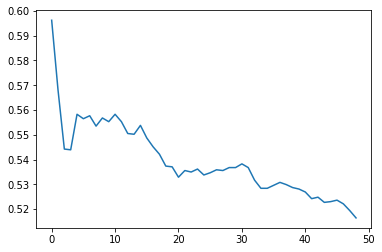

In [15]:
plt.plot(Accuracy)

In [17]:
Error.err.class_err(test_traget,predicted_labels_knn)

SW_SMARTPHONE 0.5765765765765766
SW_DRIVEASSIST 0.3711340206185567
SW_TRANSLATIONS 0.14285714285714285
SW_SPEECH 0.5784313725490197
SW_WIFI 0.5
SW_HOME_MENU 0.3076923076923077
SW_NAVIGATION 0.9081163859111792
SW_AUDIO 0.11864406779661017
TEST_FEP 0.0
SW_TUNER_AMFM 0.42574257425742573
SW_PHONE 0.5482866043613707
SW_Resets 0.4
SW_Master_HMI 0.07462686567164178
SW_DIAGNOSTIC 0.4158415841584158
SW_PARKASSIST 0.6320754716981132
SW_NAVIGATION_JPN 0.6890756302521008
SW_TUNER_SXM 0.5327868852459017
SW_SWUPDATE 0.5416666666666666
SW_INFOTAINMENT 0.5121951219512195
SW_TUNER_TV 0.4090909090909091
SW_TELEMATIC 0.38823529411764707
Production-General 0.0
SW_FRAMEWORK_HMI 0.02857142857142857
Mechanic 0.11428571428571428
SW_SYSTEM 0.2692307692307692
SW_OTAS 0.0
SW_SPM 0.26666666666666666
SW_OFFICE 0.0
SW_METER 0.26666666666666666
SW_PROFILE 0.5384615384615384
SW_Base 0.0
SW_GRAPHICS 0.045454545454545456
TEST_ZTEST 0.25
HW-General 0.0
SW_CONFIG_MGR 0.0
SW_IPCM 0.0
SW_TUNER_DAB 0.23809523809523808
SW_DI